In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def convert_time(time):
    hour = float(time[:2])
    minute = float(time[3:]) / 60

    float_time = hour + minute

    return float_time


def convert_currency(input):
    from numpy import nan
    stripped = (
        input.replace('R$', '')
        .replace('.', '')
        .replace(',', '.')
        .lstrip()
        .rstrip()
    )

    try:
        output = round(float(stripped), 2)
    except ValueError:
        return nan

    return output

In [3]:
alunos_ago = pd.read_csv(
    '../dados/alunos_ago.csv',
    sep=';',
    thousands='.',
    decimal=',',
)

alunos_ago.columns = alunos_ago.columns.str.lower()

alunos_ago.drop(alunos_ago[alunos_ago['valor'] == 0].index, inplace=True)
alunos_ago['valor'] = alunos_ago['valor'].round(2)

alunos_ago

,horas,valor
0,4.0,1130.37
1,4.0,964.32
2,4.0,964.89
3,4.0,992.37
4,4.0,1173.91
5,4.0,1023.96
7,5.0,1137.17
8,6.0,1144.53
9,6.0,1115.85
11,6.0,1530.63


In [4]:
plano = pd.read_csv(
    '../dados/plano_mensalidades_2023.csv',
    sep=';',
    thousands='.',
    decimal=',',
)

plano.columns = ['horas', 'valor']

plano['valor'] = (
    plano['valor'].str.removeprefix(' R$ ')
    .str.replace('.', '')
    .str.replace(',', '.')
    .str.replace('-', '0')
    .astype('float')
)

plano

,horas,valor
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


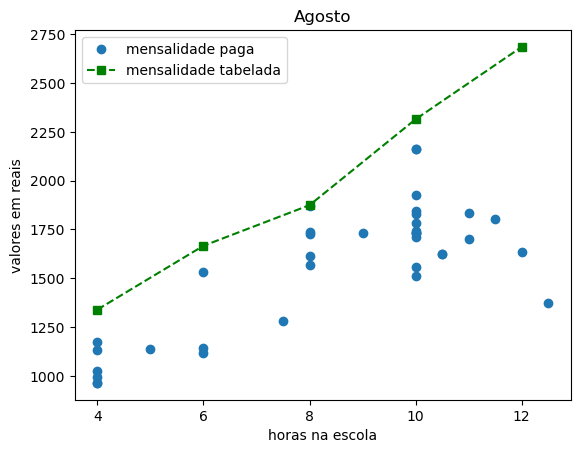

In [5]:
fig, ax = plt.subplots()

ax.plot(
    alunos_ago['horas'],
    alunos_ago['valor'],
    marker='o',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano['horas'],
    plano['valor'],
    marker='s',
    color='green',
    linestyle='dashed',
    label='mensalidade tabelada',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')

ax.legend(loc='upper left', ncols=1)

In [6]:
fig.savefig('../imagens/plano_de_mensalidades_antigo.png')